In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dreamset = pd.read_csv('dreams_dataset.csv')

dreamset.head()

,dream_id,dreamer,description,dream_date,dream_language,text_dream,characters_code,emotions_code,aggression_code,friendliness_code,...,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,1,alta,Alta: a detailed dreamer,1957,en,"The one at the Meads's house, where it's bigge...","2ISA, 1MKA, 1FDA, 1IOA, 2ISA",NaN,2IKA > Q,2IKA 4> Q,...,0.500000,0.000000,0.200000,0.200000,0.0,0.000,0.200000,0.200000,0.0,0.0
1,2,alta,Alta: a detailed dreamer,8/11/1967,en,I'm at a family reunion in a large fine house ...,"2ISA, people, 2ISA",SD 2IKA,"D > Q, Q > 2ISA",NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.666667,0.000000,0.0,1.0
2,3,alta,Alta: a detailed dreamer,8/1/1985,en,I watch a plane fly past and shortly realize i...,"2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA","SD 1ISA, AP D, AP D","It PRP >, It PRP >, D > 1FKA",NaN,...,0.333333,0.000000,0.000000,0.285714,0.0,1.000,0.428571,0.000000,0.0,1.0
3,4,alta,Alta: a detailed dreamer,1985?,en,Me pulling the green leaves and berries off so...,"1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...","SD 2ISA, SD D","Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA","1IKA 4> Q, 2ISA 4> 2ISA",...,0.666667,0.176471,0.142857,0.142857,0.0,1.000,0.235294,0.117647,0.0,1.0
4,5,alta,Alta: a detailed dreamer,1985?,en,I'm in a room that reminds me of (but definite...,"1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA","AP D, AP D, AP 1MSA, CO D, SD D, AP D","1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...",D 4> Q,...,1.000000,0.000000,0.166667,0.166667,0.0,0.875,1.333333,0.166667,0.0,1.0


In [4]:
columns_to_remove = [' dream_id', 'dreamer', 'description', 'dream_date', 'dream_language', 'text_dream', 'characters_code', 'emotions_code', 'aggression_code', 'friendliness_code', 'sexuality_code','Male', 'Animal', 'Friends', 'Family'
             , 'Dead&Imaginary', 'S/CIndex'] 
dreamset = dreamset.drop(columns=columns_to_remove)

dreamset.head()

,Aggression/Friendliness,A/CIndex,F/CIndex,NegativeEmotions
0,0.000,0.200000,0.200000,0.0
1,1.000,0.666667,0.000000,1.0
2,1.000,0.428571,0.000000,1.0
3,1.000,0.235294,0.117647,1.0
4,0.875,1.333333,0.166667,1.0


                         Aggression/Friendliness  A/CIndex  F/CIndex  \
Aggression/Friendliness                 1.000000  0.419419 -0.151796   
A/CIndex                                0.419419  1.000000  0.197938   
F/CIndex                               -0.151796  0.197938  1.000000   
NegativeEmotions                        0.177979  0.161128  0.069010   

                         NegativeEmotions  
Aggression/Friendliness          0.177979  
A/CIndex                         0.161128  
F/CIndex                         0.069010  
NegativeEmotions                 1.000000  


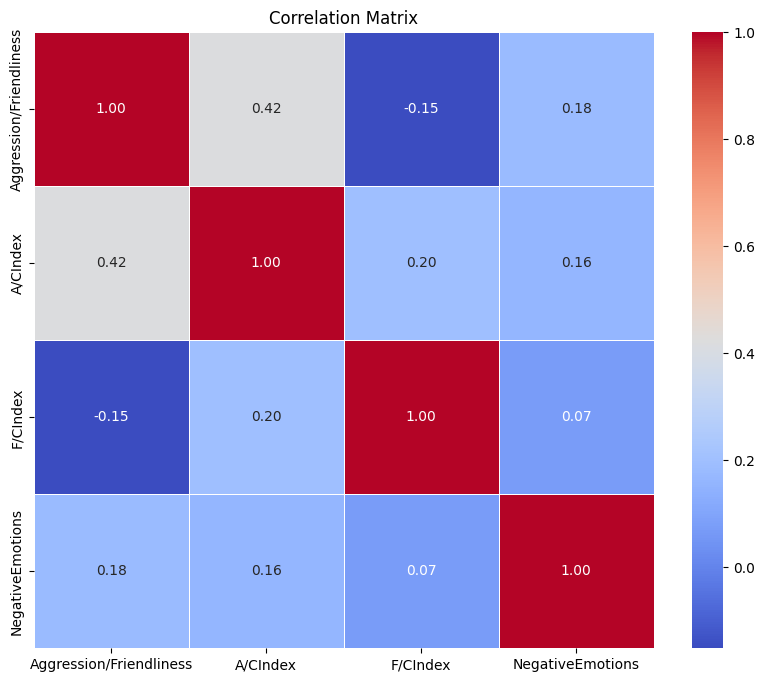

In [5]:
correlation_matrix = dreamset.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
print(dreamset.dtypes)

Aggression/Friendliness    float64
A/CIndex                   float64
F/CIndex                   float64
NegativeEmotions           float64
dtype: object


In [7]:
variables = [' dream_id', 'dreamer', 'description', 'dream_date', 'dream_language', 'text_dream', 'characters_code'
             , 'emotions_code', 'aggression_code', 'friendliness_code', 'sexuality_code', 'Male', 'Animal', 'Friends', 'Family'
             , 'Dead&Imaginary', 'Aggression/Friendliness', 'A/CImndex', 'F/CIndex/', 'S/CIndex', 'NegativeEmotions']
variable = ['Aggression/Friendliness', 'A/CIndex', 'F/CIndex', 'NegativeEmotions']
for column_name in variable:
    min_value = dreamset[column_name].min()
    max_value = dreamset[column_name].max()
    range_value = max_value - min_value
    print(f"Min {min_value}")
    print(f"Max: {max_value}")
    print(f"Range of {column_name}: {range_value}")

Min 0.0
Max: 1.0
Range of Aggression/Friendliness: 1.0
Min 0.0
Max: 10.0
Range of A/CIndex: 10.0
Min 0.0
Max: 11.0
Range of F/CIndex: 11.0
Min 0.0
Max: 1.0
Range of NegativeEmotions: 1.0


In [8]:
dreamset['NegativeEmotions'] = dreamset['NegativeEmotions'].apply(lambda x: 1 if x > 0.5 else 0)

print(dreamset.head())

   Aggression/Friendliness  A/CIndex  F/CIndex  NegativeEmotions
0                    0.000  0.200000  0.200000                 0
1                    1.000  0.666667  0.000000                 1
2                    1.000  0.428571  0.000000                 1
3                    1.000  0.235294  0.117647                 1
4                    0.875  1.333333  0.166667                 1


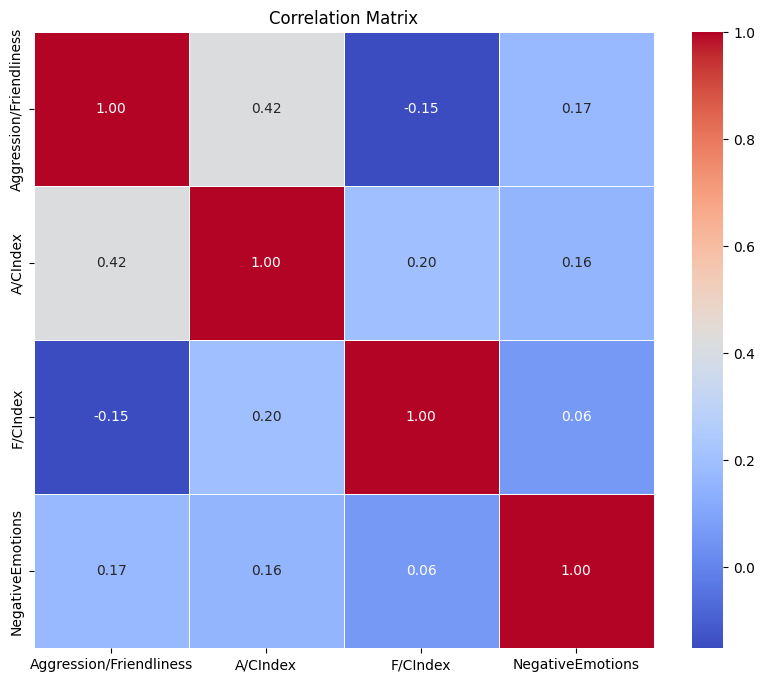

In [9]:
correlation_matrix = dreamset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:

X = dreamset.drop('NegativeEmotions', axis=1)
y = dreamset['NegativeEmotions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the KNN model: {accuracy * 100:.2f}%')

Accuracy of the KNN model: 60.14%
